In [7]:
#Classification Techiniques-SVM
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

In [8]:
df=pd.read_csv('Titanic-Dataset.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
a=df['Age'].mean()
a
c=df['Age'].replace('NA',np.nan=='mean',inplace=True)
c
df['Age'].fillna(value=a,inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
from sklearn.preprocessing import LabelEncoder
Label=LabelEncoder()

In [12]:
l=df.iloc[:,3]
l
Z=Label.fit_transform(l)
az=pd.Series(Z)
az

0      108
1      190
2      353
3      272
4       15
      ... 
886    548
887    303
888    413
889     81
890    220
Length: 891, dtype: int32

In [13]:
m=df.iloc[:,8]
m
L=Label.fit_transform(m)
L
bl=pd.Series(L)
bl

0      523
1      596
2      669
3       49
4      472
      ... 
886    101
887     14
888    675
889      8
890    466
Length: 891, dtype: int32

In [14]:
n=df.iloc[:,10]
n
M=Label.fit_transform(n)
M
cm=pd.Series(M)
cm

0      147
1       81
2      147
3       55
4      147
      ... 
886    147
887     30
888    147
889     60
890    147
Length: 891, dtype: int32

In [15]:
X=pd.concat((az,bl),axis=1)
X
abc=X.rename(columns={0:'Name',1:'Ticket'})
abc

,Name,Ticket
0,108,523
1,190,596
2,353,669
3,272,49
4,15,472
...,...,...
886,548,101
887,303,14
888,413,675
889,81,8


In [16]:
X= X.rename(str,axis="columns")
X

,0,1
0,108,523
1,190,596
2,353,669
3,272,49
4,15,472
...,...,...
886,548,101
887,303,14
888,413,675
889,81,8


In [17]:
Y=df.iloc[:,1]

In [18]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=14)
clf=svm.SVC(kernel='linear')
clf.fit(x_train,y_train)
y_pred=clf.predict(x_test)
accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy)

C:\Users\arpit\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


Accuracy: 0.6268656716417911


C:\Users\arpit\anaconda3\lib\site-packages\sklearn\utils\validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [19]:
df_results=pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df_results.head(10)

,Actual,Predicted
75,0,0
602,0,0
119,0,0
647,1,0
115,0,0
472,1,0
547,1,0
735,0,0
467,0,0
759,1,0


C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\arpit\anaconda3\lib\site-packages\seaborn\_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dty

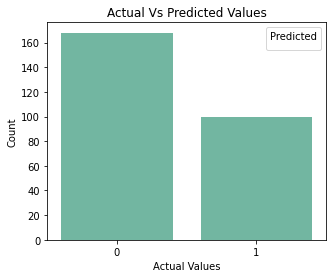

In [20]:
plt.figure(figsize=(5,4))
sns.countplot(data=df_results,x='Actual',hue='Predicted',palette='Set2')
plt.xlabel('Actual Values')
plt.ylabel('Count')
plt.title('Actual Vs Predicted Values')
plt.legend(title='Predicted',loc='upper right')
plt.show()